In [1]:
import pandas as pd

cruise_data = pd.read_csv("cruise_ship_info.csv")
cruise_data

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
...,...,...,...,...,...,...,...,...,...
153,Taurus,Star,22,3.341,0.66,2.79,0.33,50.62,0.59
154,Virgo,Star,14,76.800,19.60,8.79,9.67,39.18,12.00
155,Spirit,Windstar,25,5.350,1.58,4.40,0.74,33.86,0.88
156,Star,Windstar,27,5.350,1.67,4.40,0.74,32.04,0.88


In [6]:
# 1. there are no missing data points i.e. NULL values 
cruise_data.describe(include="all")

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158,158,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
unique,138,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Spirit,Royal_Caribbean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,NaN,NaN,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,NaN,NaN,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,NaN,NaN,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,NaN,NaN,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,NaN,NaN,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000


In [4]:
cruise_data.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


<Axes: >

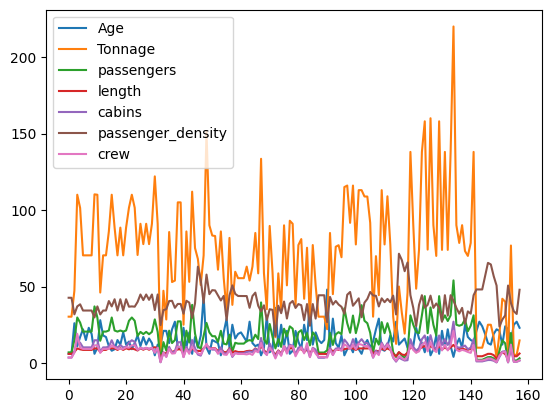

In [7]:
cruise_data.plot()

<Axes: xlabel='passengers'>

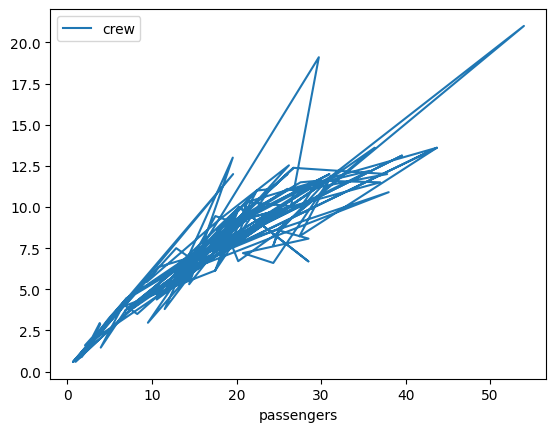

In [9]:
import numpy as np

np.random.seed(42)


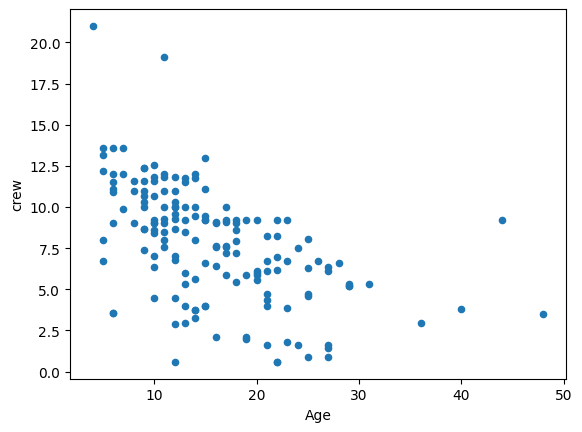

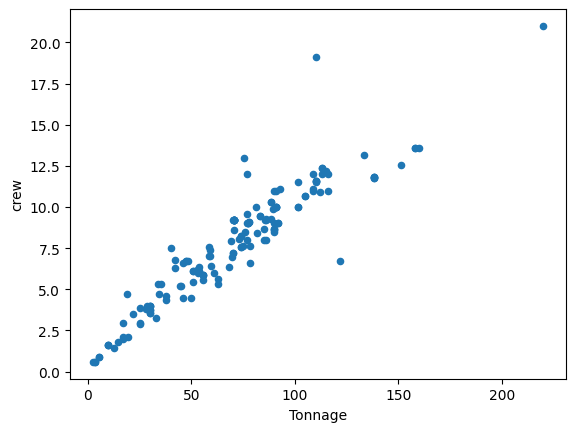

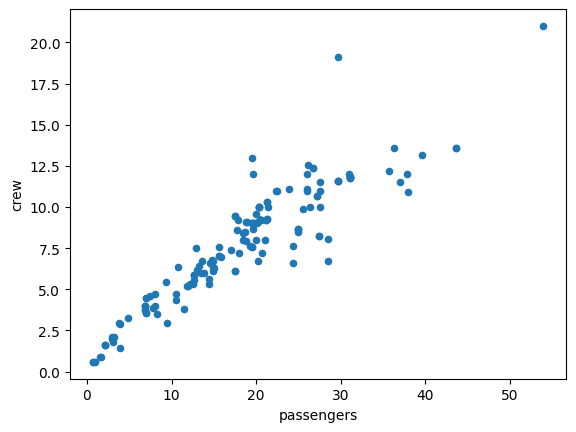

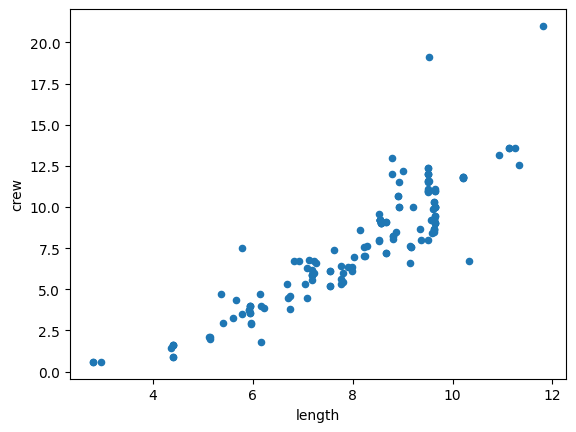

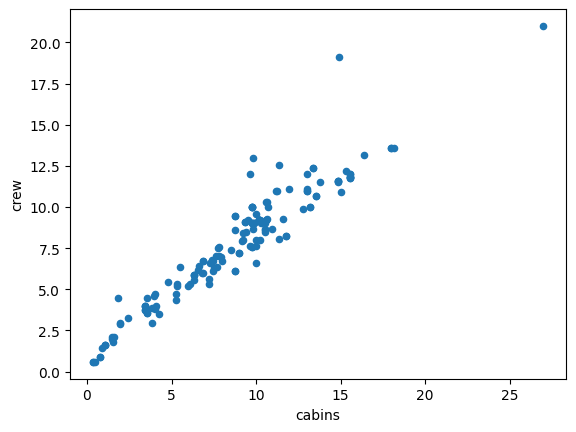

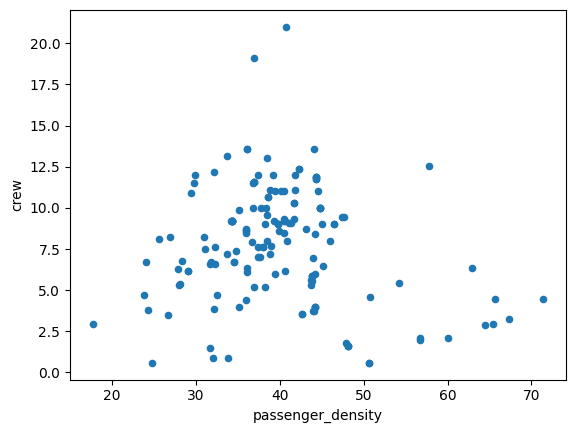

In [37]:
# visualize the plot of the 'crew' against other numerical data
# columns that look directly correlated to 'crew' include: 'Tonnage', 'passengers', 'length', 'cabin'
n_columns = ["crew"]
for i in cruise_data.columns:
    # print(i)
    if i=="crew" or i=='Ship_name' or i=='Cruise_line':
        continue
    # print(str.capitalize(i))
    n_columns.append(i)
    cruise_data.plot(x = i, y = 'crew', kind="scatter")



In [38]:
# new data frame 
n_cruise_data = cruise_data[n_columns]
n_cruise_data.head()

,crew,Age,Tonnage,passengers,length,cabins,passenger_density
0,3.55,6,30.277,6.94,5.94,3.55,42.64
1,3.55,6,30.277,6.94,5.94,3.55,42.64
2,6.70,26,47.262,14.86,7.22,7.43,31.80
3,19.10,11,110.000,29.74,9.53,14.88,36.99
4,10.00,17,101.353,26.42,8.92,13.21,38.36


In [39]:
# cabin and Tonnage are the most correlated
n_cruise_data.corr()['crew']


crew                 1.000000
Age                 -0.530657
Tonnage              0.927569
passengers           0.915234
length               0.895857
cabins               0.950823
passenger_density   -0.155509
Name: crew, dtype: float64

c:\Users\admin\Documents\pythonDevs\ship_recommendation\.venv\lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


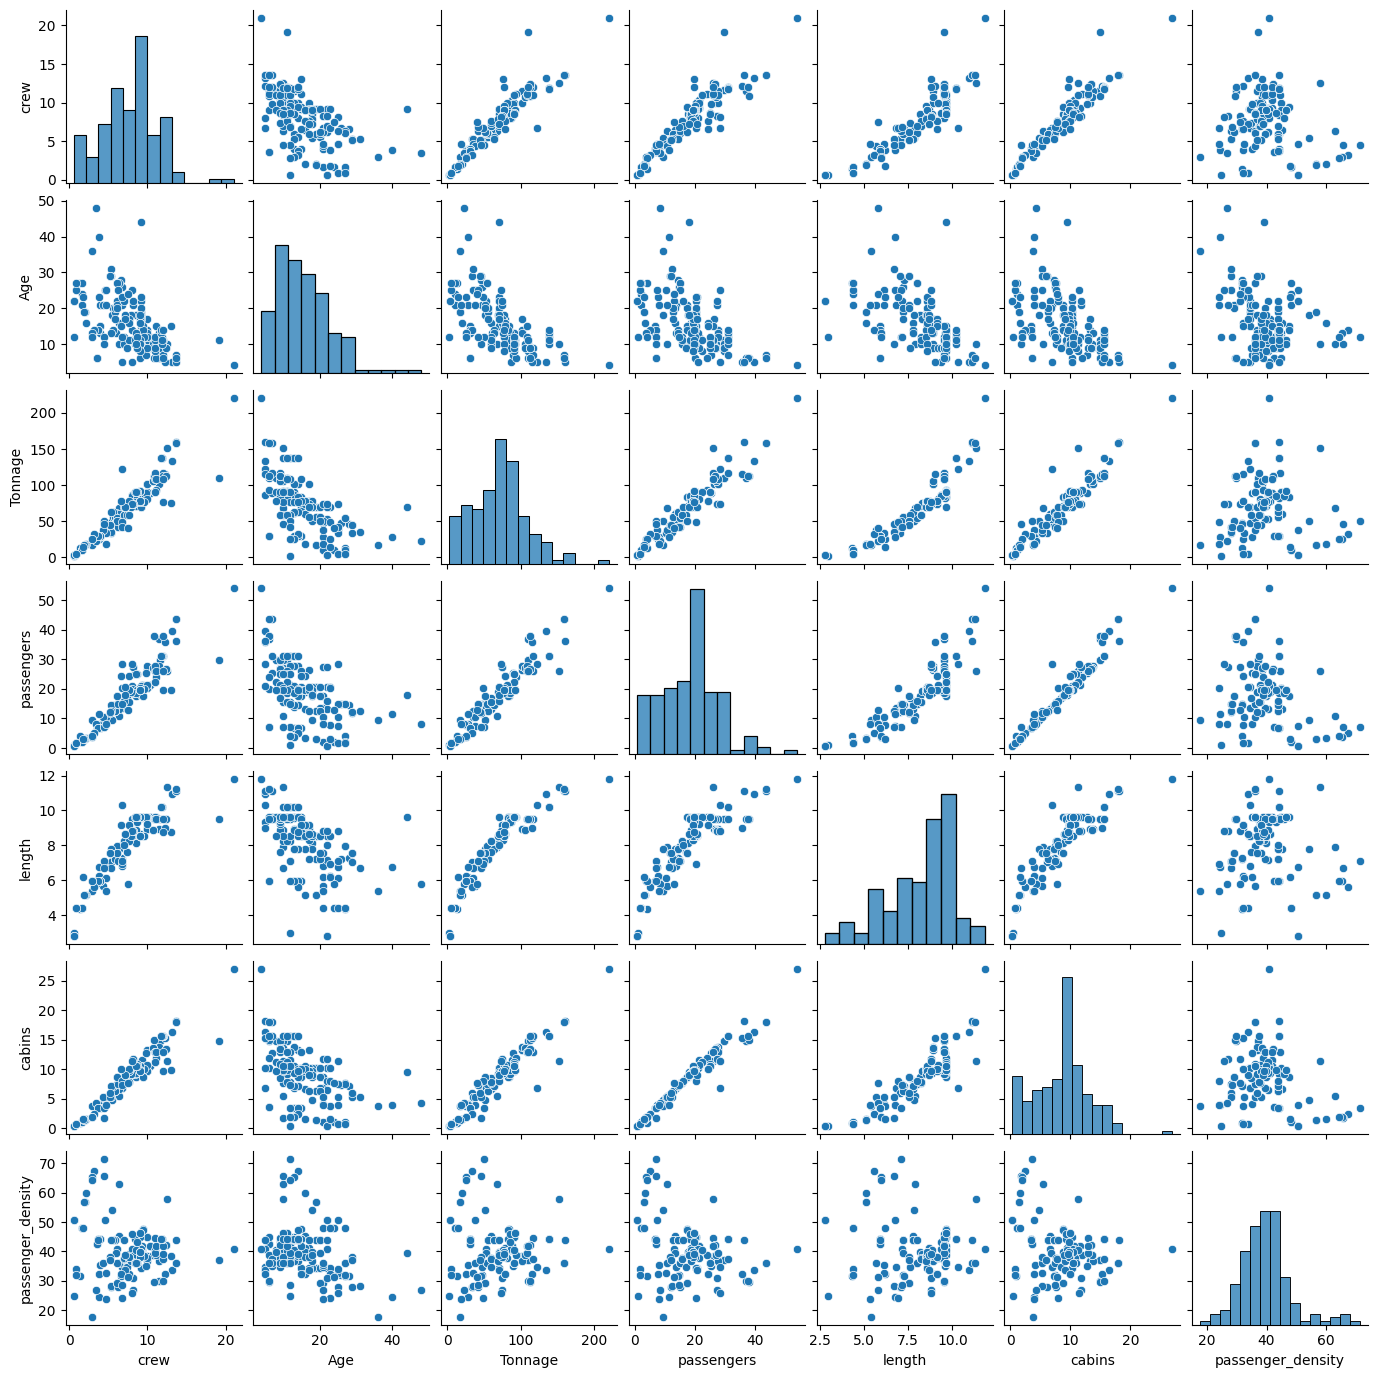

In [40]:
import seaborn as sns

sns.pairplot(cruise_data[n_columns], size=2.0)


In [52]:
# extract specific arrays
X = n_cruise_data.iloc[:,2:6].values
y = n_cruise_data["crew"].values

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


In [75]:
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression, Ridge

# Reg
mod = LinearRegression()
# mod = Lasso()
# mod = Ridge()

# classifiers
# mod2 = LogisticRegression()

mod.fit(X_train, y_train)
y_train_pred = mod.predict(X_train)
y_test_pred = mod.predict(X_test)

In [78]:
from sklearn.metrics import r2_score, mean_squared_error

print('Train MSE & R^2 results: %.3f, %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        r2_score(y_train, y_train_pred)))

print('Test MSE & R^2 results: %.3f, %.3f' % (
        mean_squared_error(y_test, y_test_pred),
        r2_score(y_test, y_test_pred)))


Train MSE & R^2 results: 0.955, 0.920
Test MSE & R^2 results: 0.889, 0.928


(-10.0, 25.0)

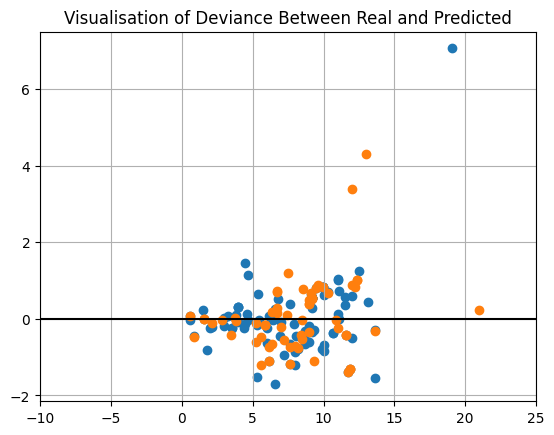

In [80]:
import matplotlib.pyplot as plt

plt.scatter(y_train, y_train-y_train_pred, label="deviance of train prediction")
plt.scatter(y_test, y_test-y_test_pred, label="deviance of test prediction")
plt.title("Visualisation of Deviance Between Real and Predicted")
plt.hlines(0, -10, 25, colors="black"); plt.grid()
plt.xlim([-10,25])